In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
import os
import numpy as np
from DataLoader3 import load_images_from_selected_classes

# Define the classes you want to sample images from
selected_classes = ['Apple Braeburn', 'Banana', 'Lemon', 'Limes']

# Path to the folder containing the images
base_folder_path = "C:/Users/aemsh/Desktop/DATA4380/ComputerVision/fruits-360_dataset/fruits-360/Training"

# Load and resize images from selected classes
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# Convert the loaded images per class into an array list
images_array_dict = {}
for class_name, images in loaded_images_dict.items():
    images_array_dict[class_name] = np.array(images)

In [6]:
# # Load and resize images from selected classes
# loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# # Convert the loaded images per class into an array list
# images_array_dict = {}
# for class_name, images in loaded_images_dict.items():
#     images_array_dict[class_name] = np.array(images)

# # Transpose the dimensions of images_array to (num_samples, height, width, channels)
# # images_array = np.transpose(images_array, (0, 1, 2, 4, 3))

# # Define the augmentation parameters
# datagen = ImageDataGenerator(
#     rotation_range=20,      # Rotate images randomly by up to 20 degrees
#     width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
#     height_shift_range=0.2, # Shift images vertically by up to 20% of the height
#     shear_range=0.2,        # Apply shear transformation with max intensity of 20%
#     zoom_range=0.2,         # Zoom in/out on images by up to 20%
#     horizontal_flip=True,   # Flip images horizontally
#     vertical_flip=True,     # Flip images vertically
#     fill_mode='nearest'     # Fill in missing pixels using nearest neighbors
# )


Generating augmented images for class: Apple Braeburn


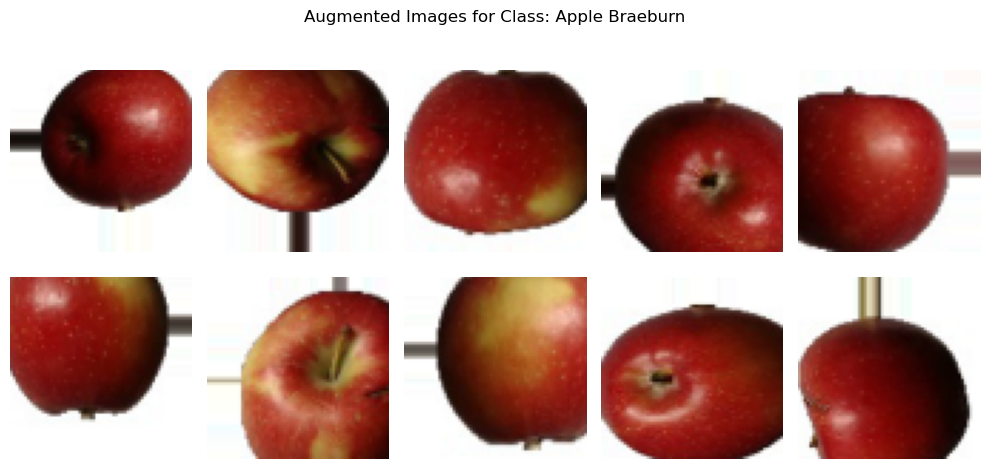

Generating augmented images for class: Banana


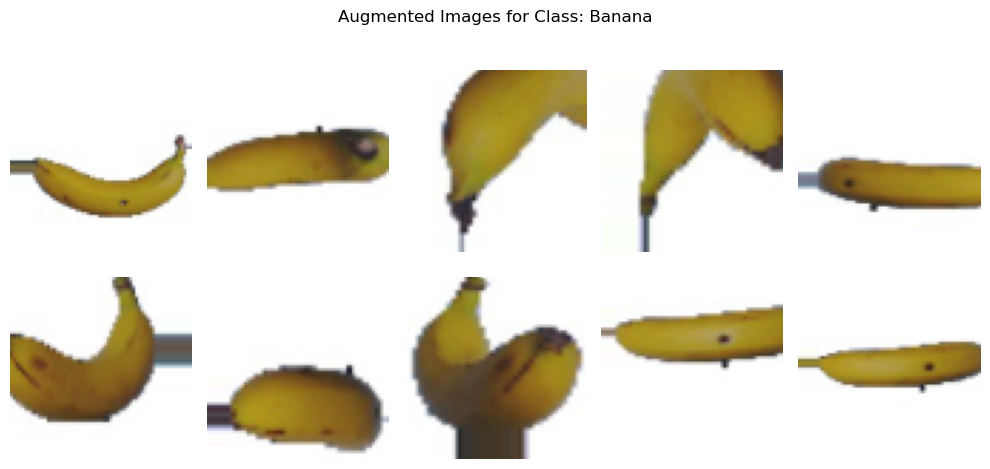

Generating augmented images for class: Lemon


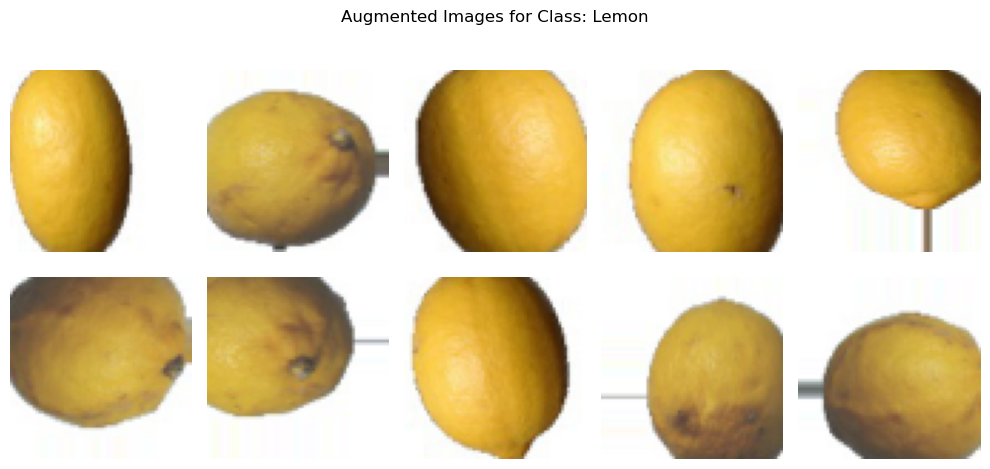

Generating augmented images for class: Limes


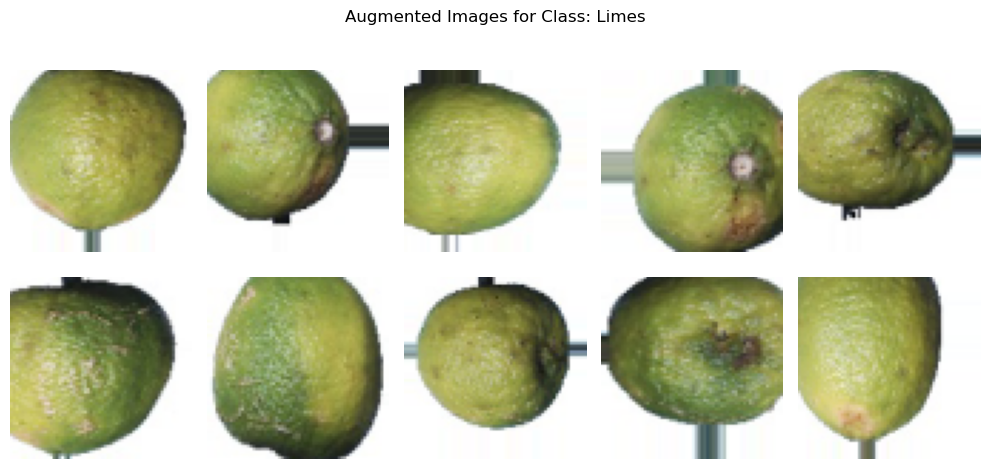

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Generate augmented images for each class
for class_name, images in images_array_dict.items():
    print(f"Generating augmented images for class: {class_name}")
    
    # Reshape images to rank 4 tensor
    images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 3)
    
    # Initialize generator for this class
    generator = datagen.flow(images, batch_size=1, shuffle=False)
    
    # Initialize subplot
    plt.figure(figsize=(10, 5))
    
    # Generate augmented images
    num_augmented_images = 0
    for batch in generator:
        augmented_image = batch[0]
        # Resize the augmented image
        resized_image = cv2.resize(augmented_image.astype(np.uint8), (64, 64))  # Change the size as needed
        # Plot the augmented image
        plt.subplot(2, 5, num_augmented_images + 1)
        plt.imshow(resized_image)
        plt.axis('off')
        num_augmented_images += 1
        if num_augmented_images >= 10:  # Generate 10 augmented images per class
            break
    
    plt.suptitle(f"Augmented Images for Class: {class_name}")
    plt.tight_layout()
    plt.show()


In [8]:
# # Load the model
# pretrained_model = tf.keras.models.load_model("my_model")

# # Use tf.io.gfile.exists instead of tf.gfile.Exists
# if tf.io.gfile.exists("my_model"):
#     print("Model directory exists")
# else:
#     print("Model directory does not exist")

Model directory exists


In [9]:
# # Compile the loaded model
# pretrained_model.compile(optimizer='adam',
#                          loss='sparse_categorical_crossentropy',
#                          metrics=['accuracy'])


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Concatenate all images and labels into arrays
X = []
y = []
for class_name, images_array in images_array_dict.items():
    X.extend(images_array)
    y.extend([class_name] * len(images_array))

X = np.array(X)
y = np.array(y)

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert class labels to one-hot encoding
y_onehot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(X_train.shape[1:])),  # Flatten the input images
    Dense(256, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10



8/8 [==============================] - 7s 586ms/step - loss: 46705.5625 - accuracy: 0.2773 - val_loss: 29743.9961 - val_accuracy: 0.2812
Epoch 2/10
8/8 [==============================] - 4s 485ms/step - loss: 11090.4355 - accuracy: 0.5625 - val_loss: 7122.8462 - val_accuracy: 0.6562
Epoch 3/10
8/8 [==============================] - 3s 419ms/step - loss: 4703.5547 - accuracy: 0.6211 - val_loss: 58.4237 - val_accuracy: 0.9375
Epoch 4/10
8/8 [==============================] - 3s 417ms/step - loss: 1174.7046 - accuracy: 0.8555 - val_loss: 315.2822 - val_accuracy: 0.8438
Epoch 5/10
8/8 [==============================] - 3s 440ms/step - loss: 237.7145 - accuracy: 0.9258 - val_loss: 91.8921 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 3s 427ms/step - loss: 106.7568 - accuracy: 0.9492 - val_loss: 153.3197 - val_accuracy: 0.9531
Epoch 7/10
8/8 [==============================] - 3s 423ms/step - loss: 36.0624 - accuracy: 0.9844 - val_loss: 0.0000e+00 - val_accuracy: 1.

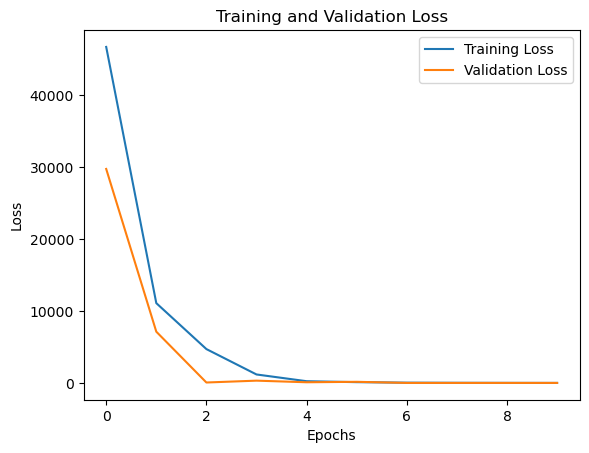

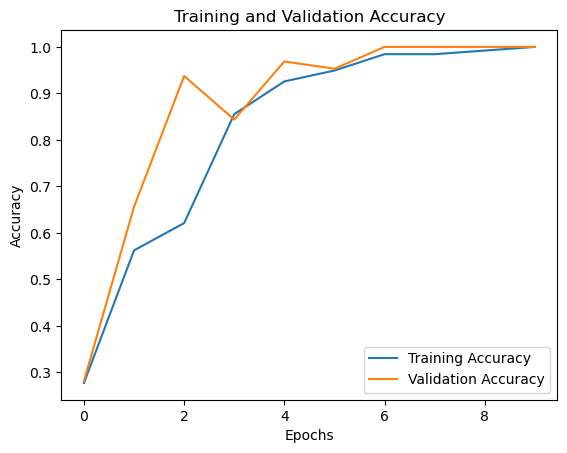

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()